In [31]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import utils
import sys
sys.path.append('..')
import Parameters
reasonable_rate = 0.5
target_split = 'random'
ratio = 0.8
attack_goal = 'single'
neighbor_num = 20
candidate_mode = 'quadratic'
target_existed = False
target_size = 50
model = 'distmult'
data = 'GNBR'
mode = 'bioBART'

In [32]:
scored_generation_path = f'generate_abstract/bioBART/{target_split}_{reasonable_rate}{ratio}_scored.json'
scored_generation = json.load(open(scored_generation_path, 'r'))
print(scored_generation.keys())
data_path = os.path.join('processed_data', data)
target_path = os.path.join(data_path, 'DD_target_{0}_{1}_{2}_{3}_{4}_{5}.txt'.format(model, data, target_split, target_size, 'exists:'+str(target_existed), attack_goal))
attack_path = os.path.join('attack_results', data, 'cos_{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}.txt'.format(model, 
                                                        target_split, 
                                                        target_size, 
                                                        'exists:'+str(target_existed),
                                                        neighbor_num,
                                                        candidate_mode,
                                                        attack_goal,
                                                        str(reasonable_rate)))
target_data = utils.load_data(target_path)
attack_data = utils.load_data(attack_path, drop=False)
with open(os.path.join(data_path, 'entities_reverse_dict.json')) as fl:
    idtomeshid = json.load(fl)
with open(Parameters.GNBRfile+'entity_raw_name', 'rb') as fl:
    entity_raw_name = pkl.load(fl)
#f'generate_abstract/{.target_split}_{.reasonable_rate}{.ratio}_bioBART_finetune.json'
finetuned_result_path = f'generate_abstract/{target_split}_{reasonable_rate}{ratio}_bioBART_finetune.json'
finetuned_result = json.load(open(finetuned_result_path, 'r'))
modified_attack_path = os.path.join('attack_results', data, 'cos_{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}{8}.txt'.format(model, 
                                                        target_split, 
                                                        target_size, 
                                                        'exists:'+str(target_existed),
                                                        neighbor_num,
                                                        candidate_mode,
                                                        attack_goal,
                                                        str(reasonable_rate),
                                                        mode))
gpt_attack_path = os.path.join('attack_results', data, 'cos_{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}{8}.txt'.format(model, 
                                                        target_split, 
                                                        target_size, 
                                                        'exists:'+str(target_existed),
                                                        neighbor_num,
                                                        candidate_mode,
                                                        attack_goal,
                                                        str(reasonable_rate),
                                                        'sentence'))
# for method in ['init', 'bioBART']:
init_rank_path = 'eval_record/{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}{8}'.format('distmult', 
                                                                    target_split, 
                                                                    50, 
                                                                    'exists:'+str(False),
                                                                    20,
                                                                    'quadratic',
                                                                    'single',
                                                                    reasonable_rate,
                                                                    'init')
attack_rank_path = 'eval_record/{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}{8}'.format('distmult',
                                                                    target_split,
                                                                    50,
                                                                    'exists:'+str(False),
                                                                    20,
                                                                    'quadratic',
                                                                    'single',
                                                                    reasonable_rate,
                                                                    'bioBART')
edge_rank_path = 'eval_record/{0}_{1}_{2}_{3}_{4}_{5}_{6}_{7}{8}'.format('distmult',
                                                                    target_split,
                                                                    50,
                                                                    'exists:'+str(False),
                                                                    20,
                                                                    'quadratic',
                                                                    'single',
                                                                    reasonable_rate,
                                                                    '')

attack_rank_path += '_batch_nodirect'
edge_rank_path += '_batch_nodirect'
init_results, init_ranks, init_totals = pkl.load(open(init_rank_path, 'rb'))
attack_results, attack_ranks, attack_totals, attack_index = pkl.load(open(attack_rank_path, 'rb'))
edge_results, edge_ranks, edge_totals, edge_index = pkl.load(open(edge_rank_path, 'rb'))
with open(modified_attack_path, 'rb') as fl:
    modified_attack = pkl.load(fl)
with open(gpt_attack_path, 'rb') as fl:
    gpt_attack = pkl.load(fl)

dict_keys(['15248_10_17919_0', '15248_10_16616_1', '15248_10_21438_2', '23738_24_17699_3', '15248_10_17763_4', '39994_18_21583_5', '15248_10_19645_6', '23738_21_17770_7', '15248_10_18548_8', '24575_18_18061_9', '15248_10_19941_10', '23738_24_20448_11', '15248_10_16902_12', '15248_10_19522_13', '15248_10_19422_14', '23738_24_16749_15', '15248_10_19727_16', '15248_10_19449_17', '15248_13_16503_18', '34956_17_17547_19', '14220_10_17753_20', '14220_13_20233_21', '14220_10_21737_22', '14220_10_17071_23', '14220_10_17515_24', '14220_10_21440_25', '14661_10_21050_26', '14220_10_19243_27', '14220_13_21149_28', '14220_14_19439_29', '14220_11_20627_30', '14220_10_20428_31', '14220_16_21727_32', '14220_13_21493_33', '14220_10_18206_34', '14220_10_17846_35', '14220_16_21704_36', '14220_11_17151_37', '14220_10_21450_38', '27932_20_19513_39', '78_10_20899_40', '43719_24_18342_41', '9598_10_19455_42', '9598_10_19809_43', '30108_22_16643_44', '9598_10_17158_45', '9598_10_19964_46', '9598_10_20727_47',

In [34]:
add = 0
selected_index = []
pp_key_list = []
for u, v in zip(edge_index, attack_index):
    assert u == v
for i, ((ts, tr, to), (s, r, o)) in enumerate(zip(target_data, attack_data)):
    if ts == s and to == o:
        add += 1
    # if False:
    #     add += 1
    else:
        # print(i, ts, tr, to, s, r, o)
        # print(entity_raw_name[idtomeshid[ts]], Parameters.edge_id_to_type[int(tr)], entity_raw_name[idtomeshid[to]])
        # print(entity_raw_name[idtomeshid[s]], Parameters.edge_id_to_type[int(r)], entity_raw_name[idtomeshid[o]])
        selected_index.append(i)
        pp_key_list.append((f'{s}_{r}_{o}_{i}', idtomeshid[s], Parameters.edge_id_to_type[int(r)], idtomeshid[o]))
print(add)

151


In [36]:
check = {}
print(len(set(list(attack_index))))
print(len(modified_attack))
print(len(gpt_attack))
for s_id, (k, s_name, r_name, t_name) in zip(selected_index, pp_key_list):

    if k != '8969_6_35584_121':
        continue
    # print(scored_generation[k].keys()) #['path', 'prompt', 'in', 's', 'o', 'out', 'bound']
    # print(scored_generation[k]['s'], scored_generation[k]['o'])
    # print('\t', entity_raw_name[s_name], entity_raw_name[t_name])
    assert str(s_id) == k.split('_')[-1]
    scored_out = scored_generation[k]['out']
    # print(len(scored_out))
    L = len(scored_out) // 2
    score_list = []
    for text, score in scored_out:
        score_list.append(score)
    pre = np.array(score_list[:L])
    p = np.argmin(pre)
    ts, tr, to = target_data[s_id]
    attack_edges = modified_attack[s_id]
    gpt_edges = gpt_attack[s_id]
    if score_list[p] < score_list[L]:
        # if (p < (L // 2)):
            # print('inner')
        # else:
        #     print('outer')
            # print(k , 'pre', score_list[p], 'post', score_list[L])
        if scored_out[p][0] != finetuned_result[k]['out']:
            print(k)
            raise Exception('not match')
        attack_edges = modified_attack[s_id]
        gpt_edges = gpt_attack[s_id]
        bo = False
        for s, r, o in attack_edges:
            if f'{s}_{r}_{o}' in k:
                bo = True
        for s, r, o in gpt_edges:
            if f'{s}_{r}_{o}' in k:
                bo = False
        extract_edges = []
        extract_ids = []
        for s, r, o in attack_edges:
            extract_edges.append(f'{entity_raw_name[idtomeshid[s]]}_{Parameters.edge_id_to_type[int(r)]}_{entity_raw_name[idtomeshid[o]]}')
            extract_ids.append(f'{idtomeshid[s]}_{idtomeshid[o]}')
        if bo:
            # print(k)
            # print(attack_edges)
            # print(gpt_edges)
            # break
            iindex = list(attack_index).index(s_id)
            init_rank = init_ranks[iindex]
            attack_rank = attack_ranks[iindex]
            if p <= (L // 2):
                mode = 'inner'
            else:
                mode = 'outer'
            check[k] = {
                'mode': mode + str(p),
                'target_s': entity_raw_name[idtomeshid[ts]],
                'target_o': entity_raw_name[idtomeshid[to]],
                'poison_s': scored_generation[k]['s'],
                'poison_o': scored_generation[k]['o'],
                'init_rank': int(init_rank),
                'attack_rank': int(attack_rank),
                'edge_rank': int(edge_ranks[iindex]),
                'extract_edges': extract_edges,
                'extract_ids': extract_ids,
                'prompt' : scored_generation[k]['prompt'],
                'in': scored_generation[k]['in'],
                'out': scored_generation[k]['out'][p],
                'gpt': scored_generation[k]['out'][L]
            }
print(len(check))
with open('case_study/case_study.json', 'w') as f:
    json.dump(check, f, indent=4)

400
400
400
1


30
['nsubjpass(treated-20, METHODS-1)', 'cc(METHODS-1, AND-2)']


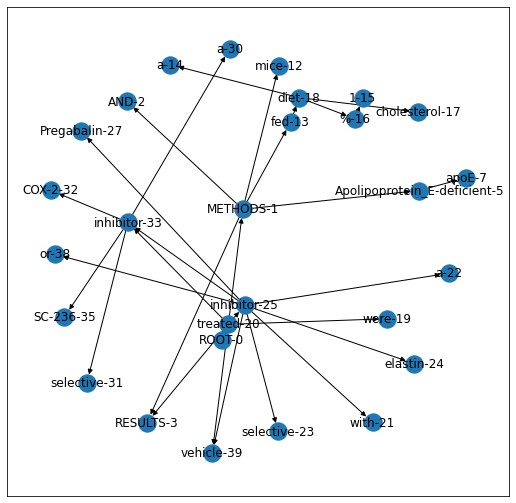

In [48]:
import networkx as nx  
from networkx.drawing.nx_agraph import graphviz_layout
links = []
with open('case_study/case_parse_out.txt', 'r') as f:
    for line in f.readlines():
        if len(line) > 2:
            links.append(line.strip())
print(len(links))
print(links[:2])
edges_list = []
for line in links:
    # print(line)
    aa = line.split('(')
    ttp, tmp = aa[0], aa[1]
    assert tmp[-1] == ')'
    tmp = tmp[:-1]
    e1, e2 = tmp.split(', ')
    ttp = ttp.split(':')[0]
    edges_list.append((e1, e2))
graph = nx.DiGraph(edges_list)
# visualize graph 
# set root = ROOT-0
# nodes = graph.nodes
# for node in nodes:
#     for node_j in nodes:
#         if graph.
import matplotlib.pyplot as plt
plt.figure(figsize =(9, 9))
# change layout

plt.savefig('case_study/case_study_tree.pdf')
plt.show()